In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import scipy.stats as stats

In [ ]:
# balanced dataset - similar count value
# EDA is diff than
# imbalanced dataset

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [ ]:
df.columns =  ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

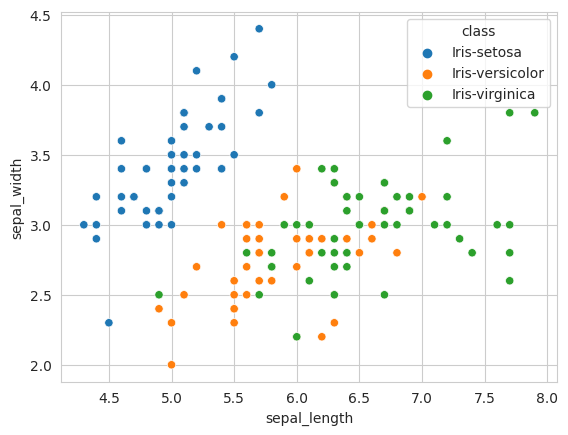

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(df, x="sepal_length", y="sepal_width", hue="class")

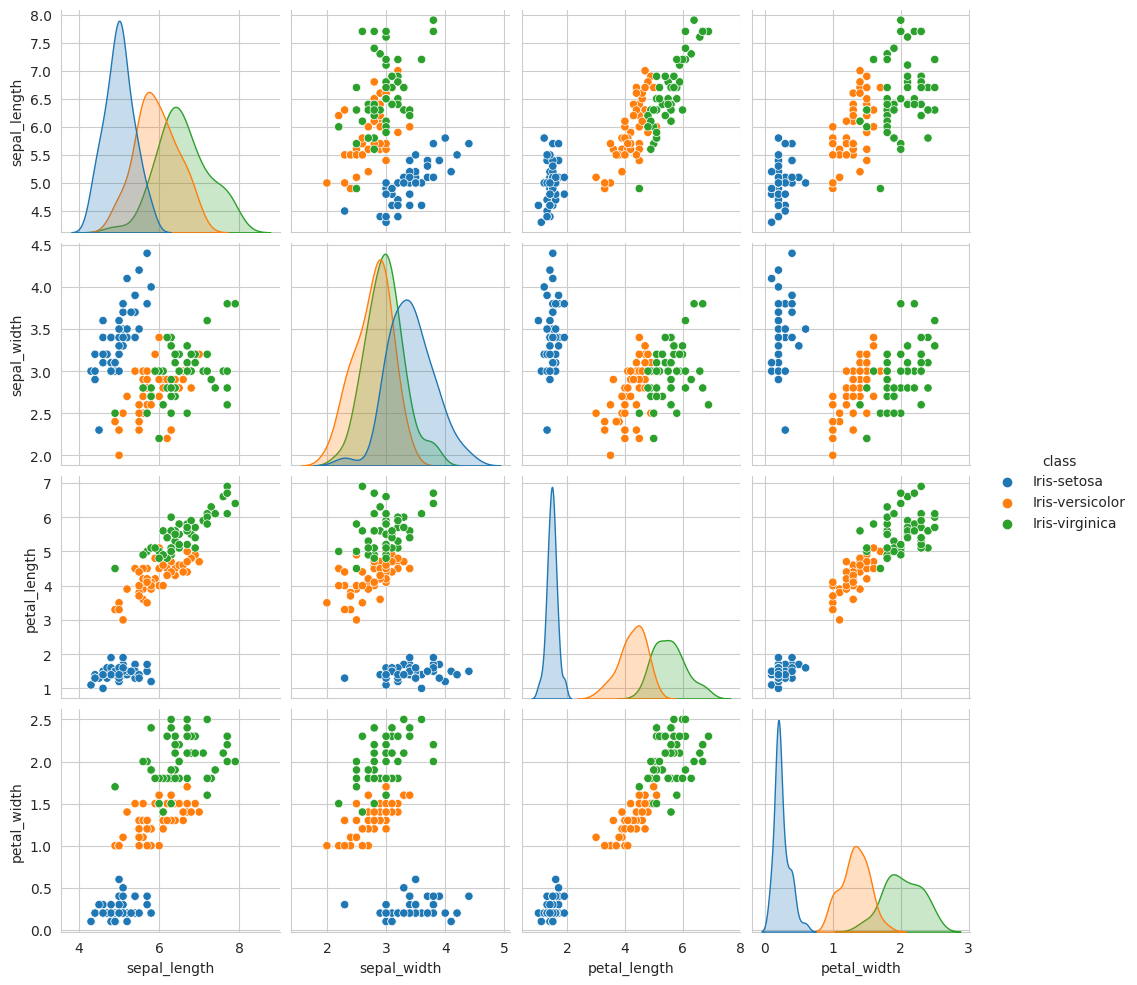

In [ ]:
sns.pairplot(df, hue="class")

<Axes: xlabel='petal_length', ylabel='Count'>

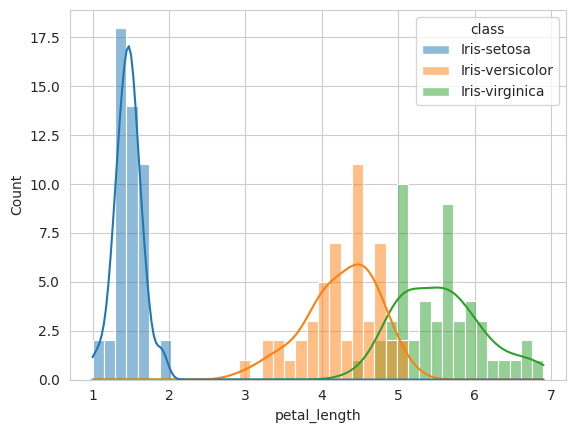

In [ ]:
sns.histplot(df, x="petal_length", hue='class', bins=40,  kde=True)

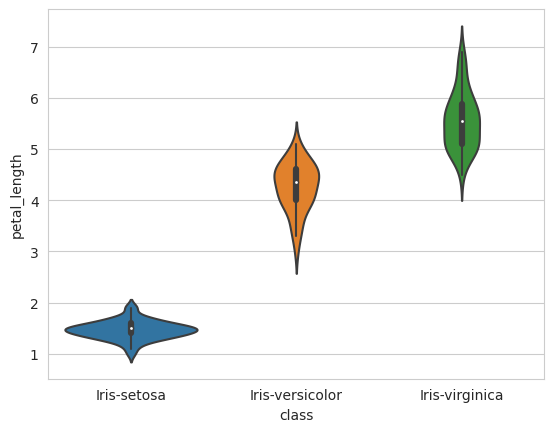

In [ ]:
sns.violinplot(x='class', y='petal_length', data = df);

In [ ]:
##########################################

In [ ]:
std_normal = np.random.normal(scale=5, loc=100, size=1000)

In [ ]:
percentiles = []
for i in range(0,101):
  percentiles.append(np.percentile(std_normal, i))

In [ ]:
percentiles

[86.09915047952013,
 89.34112650623574,
 90.44957604978096,
 91.41207927379389,
 91.63038312883512,
 91.92738069282244,
 92.30172017533745,
 92.81460341674543,
 93.15626732917039,
 93.50904805211397,
 93.88261432042043,
 94.37225507666444,
 94.78899339080213,
 95.01608875019792,
 95.3278254507359,
 95.50733044933988,
 95.7123439889364,
 95.88719955130564,
 96.05229972807547,
 96.16556498763653,
 96.30016545789526,
 96.61339237735518,
 96.81177463412884,
 96.97344109699092,
 97.1514502178436,
 97.26795982073898,
 97.34657686240986,
 97.50857123197943,
 97.64692941315559,
 97.76938846380463,
 97.92487113230621,
 98.12009568607347,
 98.26088378281119,
 98.3851635295226,
 98.54495886871051,
 98.62623296017871,
 98.73273860604124,
 98.86529158784812,
 98.96093662853515,
 99.08945228512692,
 99.15534789463248,
 99.31571736256471,
 99.41180849959544,
 99.53132263346839,
 99.66565118518606,
 99.75822445722714,
 99.8742199954247,
 99.98791614958594,
 100.0912398143298,
 100.35006094074431,
 100

((array([-2.46559223, -2.12969426, -1.93551166, -1.79497166, -1.68292872,
         -1.58873795, -1.50684558, -1.43396966, -1.36800153, -1.30750201,
         -1.25144286, -1.19906255, -1.14978047, -1.10314321, -1.05878951,
         -1.0164265 , -0.97581327, -0.936749  , -0.8990644 , -0.86261526,
         -0.82727764, -0.79294411, -0.75952082, -0.72692526, -0.69508439,
         -0.66393316, -0.63341332, -0.60347244, -0.57406307, -0.54514209,
         -0.5166701 , -0.48861096, -0.46093139, -0.43360059, -0.40658995,
         -0.37987278, -0.35342408, -0.32722038, -0.30123948, -0.27546038,
         -0.24986308, -0.22442848, -0.19913826, -0.1739748 , -0.14892104,
         -0.12396041, -0.0990768 , -0.07425439, -0.04947765, -0.02473126,
          0.        ,  0.02473126,  0.04947765,  0.07425439,  0.0990768 ,
          0.12396041,  0.14892104,  0.1739748 ,  0.19913826,  0.22442848,
          0.24986308,  0.27546038,  0.30123948,  0.32722038,  0.35342408,
          0.37987278,  0.40658995,  0.

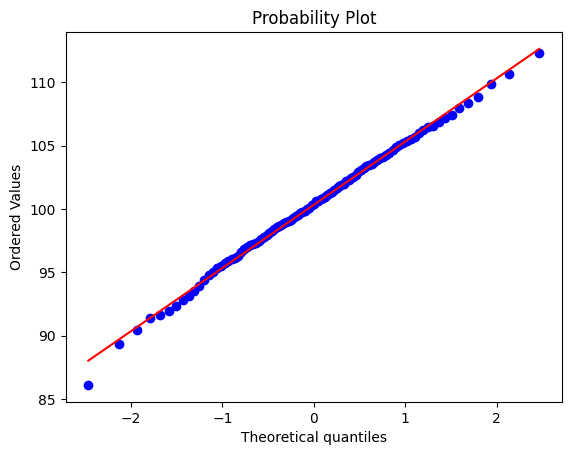

In [ ]:
stats.probplot(x=percentiles, plot=plt)

In [ ]:
# Normal Distr - Q-Q plot (above)
# Log Normal - Plot log(y).
# Pareto - log(y) - log(x) is Normal.
# Pareto / PowerLaw - Apply Box - Cox transform
# y' = (y^lambda - 1)/lambda
########################################################################
# CLT pop mean = sample mean. pop sd = sample sd/sqrt(n)

In [56]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [57]:
x = np.array([180, 162, 158, 172, 168, 150, 171, 183, 165, 176])

In [58]:
iter = 1000
sampling = 10
# kept same size as of x, could be lesser but since size of x itself is small...

In [62]:
medians = list()
for i in range(iter):
  s = resample(x, n_samples = sampling)
  medians.append( np.median(s) )

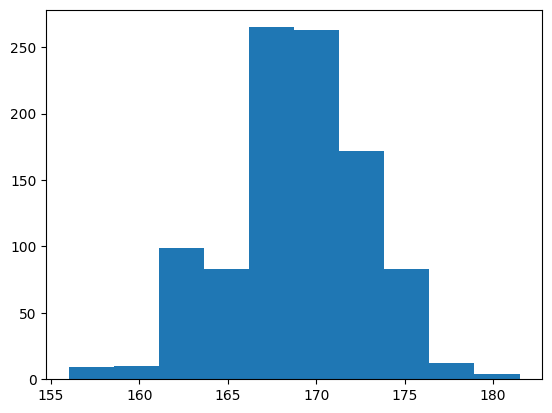

In [64]:
plt.hist(medians)
plt.show()

In [65]:
# consider 95% confidence (same for other statistical measures)
print(np.percentile(medians, 2.5),' to ',np.percentile(medians,97.5))

161.5  to  176.0


In [ ]:
################### K - S TEST ###################
# rejected null hypo if D more than c(alpha)[sqrt[(m+n)/(mn)]]

[]

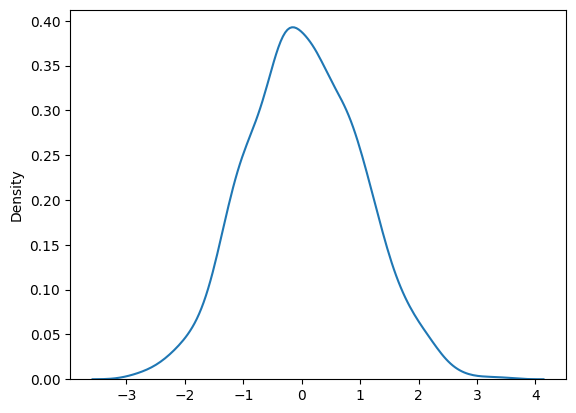

In [ ]:
x = stats.norm.rvs(size=1000)
sns.kdeplot(np.array(x))
plt.plot()

In [ ]:
stats.kstest(x, 'norm') #high p value indicates same dist. here

KstestResult(statistic=0.023097874245022368, pvalue=0.6514180494869024, statistic_location=-1.3159353325962773, statistic_sign=-1)

In [ ]:
########## Dimensionality Reduction ################

In [ ]:
# MNIST t-SNE

In [41]:
mnist = pd.read_csv('mnist.csv')

l = mnist['label']
d = mnist.drop("label",axis=1)

In [42]:
labels = l.head(1000)
data = d.head(1000)

In [43]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
from sklearn.manifold import TSNE

In [44]:
model = TSNE(random_state=42, n_iter=5000)

In [45]:
tsne_data = model.fit_transform(data)

In [46]:
tsne_data = np.vstack((tsne_data.T, labels))

In [47]:
tsne_data.shape

(3, 1000)

In [48]:
tsne_data = tsne_data.T

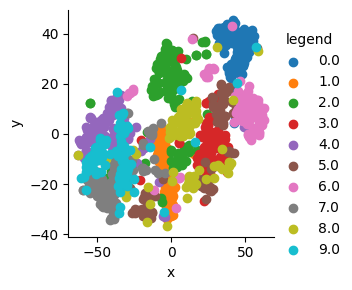

In [49]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("x", "y", "legend"))
sns.FacetGrid(tsne_df, hue="legend").map(plt.scatter, 'x', 'y').add_legend()
plt.show()